In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [2]:
df = pd.read_csv('demo02.csv')
df.head()

,Unnamed: 0,sexo_m,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,0,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,1,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,0,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [3]:
y = df['mau']
X = df.drop(['mau'], axis=1)
X.head()

,Unnamed: 0,sexo_m,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,...,educacao_Secondary / secondary special,estado_civil_Married,estado_civil_Separated,estado_civil_Single / not married,estado_civil_Widow,tipo_residencia_House / apartment,tipo_residencia_Municipal apartment,tipo_residencia_Office apartment,tipo_residencia_Rented apartment,tipo_residencia_With parents
0,0,1,1,1,0,58.832877,3.106849,1,0,0,...,1,1,0,0,0,1,0,0,0,0
1,1,0,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
2,2,0,0,1,0,52.356164,8.358904,1,0,1,...,1,0,0,1,0,1,0,0,0,0
3,3,1,1,1,0,46.224658,2.106849,1,1,1,...,0,1,0,0,0,1,0,0,0,0
4,4,0,1,0,0,29.230137,3.021918,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [4]:
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.3, random_state=123)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [5]:
clf = DecisionTreeClassifier(random_state=123)

In [6]:
clf.fit(X_treino, y_treino)

DecisionTreeClassifier(random_state=123)

[Text(0.5809449404761905, 0.9772727272727273, 'Unnamed: 0 <= 16470.5\ngini = 0.046\nsamples = 11655\nvalue = [11382, 273]\nclass = Bom'),
 Text(0.5771354166666667, 0.9318181818181818, 'tempo_emprego <= 2.747\ngini = 0.026\nsamples = 11534\nvalue = [11382, 152]\nclass = Bom'),
 Text(0.3562481398809524, 0.8863636363636364, 'tempo_emprego <= 2.742\ngini = 0.038\nsamples = 4100\nvalue = [4020, 80]\nclass = Bom'),
 Text(0.23440104166666667, 0.8409090909090909, 'idade <= 30.445\ngini = 0.037\nsamples = 4095\nvalue = [4018, 77]\nclass = Bom'),
 Text(0.08857142857142856, 0.7954545454545454, 'idade <= 30.437\ngini = 0.094\nsamples = 447\nvalue = [425, 22]\nclass = Bom'),
 Text(0.08476190476190476, 0.75, 'Unnamed: 0 <= 16061.0\ngini = 0.09\nsamples = 446\nvalue = [425, 21]\nclass = Bom'),
 Text(0.05523809523809524, 0.7045454545454546, 'Unnamed: 0 <= 13412.5\ngini = 0.079\nsamples = 437\nvalue = [419, 18]\nclass = Bom'),
 Text(0.02666666666666667, 0.6590909090909091, 'idade <= 28.567\ngini = 0.05

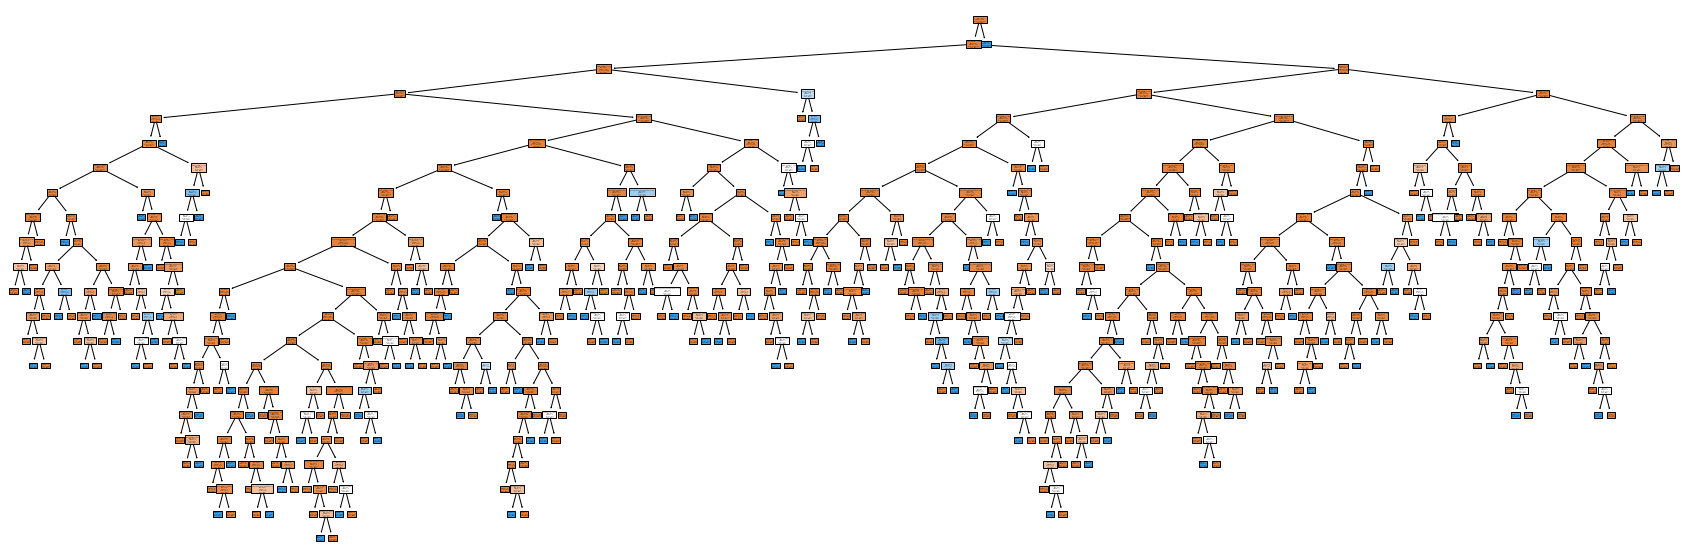

In [7]:
plt.figure(figsize=(30, 10))
plot_tree(
    clf, 
    filled=True, 
    feature_names=X_treino.columns,
    class_names=['Bom', 'Mau']
)

/home/nerdman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


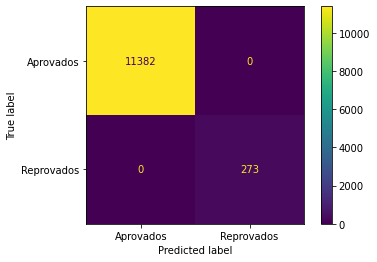

In [8]:
plot_confusion_matrix(clf, X_treino, y_treino, display_labels=['Aprovados', 'Reprovados'])

In [9]:
y_treino_pred = clf.predict(X_treino)
accuracy_score(y_treino, y_treino_pred)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

/home/nerdman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


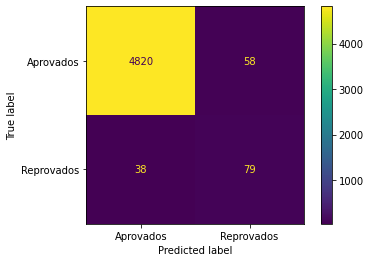

In [10]:
plot_confusion_matrix(clf, X_teste, y_teste, display_labels=['Aprovados', 'Reprovados'])

In [11]:
y_teste_pred = clf.predict(X_teste)
accuracy_score(y_teste, y_teste_pred) # Acurácia de treino = 100%

0.9807807807807808

In [12]:
clf_2 = DecisionTreeClassifier(min_samples_leaf=5, max_depth=10, random_state=123)
clf_2.fit(X_treino, y_treino)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)

/home/nerdman/.local/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


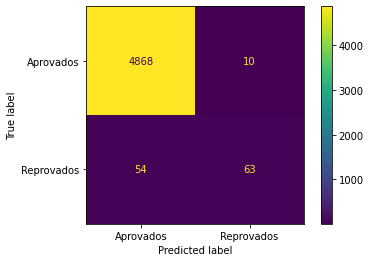

In [13]:
plot_confusion_matrix(clf_2, X_teste, y_teste, display_labels=['Aprovados', 'Reprovados'])

In [ ]:
y_teste_pred = clf_2.predict(X_teste)

In [20]:
conf_matrix = confusion_matrix(y_pred=y_teste_pred, y_true=y_teste)
conf_matrix

array([[4868,   10],
       [  54,   63]])

In [25]:
accuracy_score(y_teste, y_teste_pred)

0.9807807807807808

In [23]:
total_clientes = (
    conf_matrix[0,0] + 
    conf_matrix[0,1] + 
    conf_matrix[1,0] + 
    conf_matrix[1, 1]
)
perc_maus = (conf_matrix[0,1] + conf_matrix[1,1]) / total_clientes * 100
perc_maus

1.4614614614614614

In [24]:
acc_todos_aprov = (conf_matrix[0,0] + conf_matrix[0,1]) / total_clientes * 100
acc_todos_aprov # Acurácia de teste = 98%

97.65765765765767